In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def relu(preactivation:np.ndarray)->np.ndarray:

    return np.maximum(0,preactivation)
    
    

In [3]:
def test_relu():
    # Test with positive values
    input_array = np.array([1, 2, 3])
    expected_output = np.array([1, 2, 3])
    np.testing.assert_array_equal(relu(input_array), expected_output)
    

    # Test with zero
    input_array = np.array([0, 0, 0])
    expected_output = np.array([0, 0, 0])
    np.testing.assert_array_equal(relu(input_array), expected_output)

    # Test with negative values
    input_array = np.array([-1, -2, -3])
    expected_output = np.array([0, 0, 0])
    np.testing.assert_array_equal(relu(input_array), expected_output)

    # Test with mixed values
    input_array = np.array([-1, 0, 1])
    expected_output = np.array([0, 0, 1])
    np.testing.assert_array_equal(relu(input_array), expected_output)

    print("All tests passed!")

# Run the test
test_relu()

All tests passed!


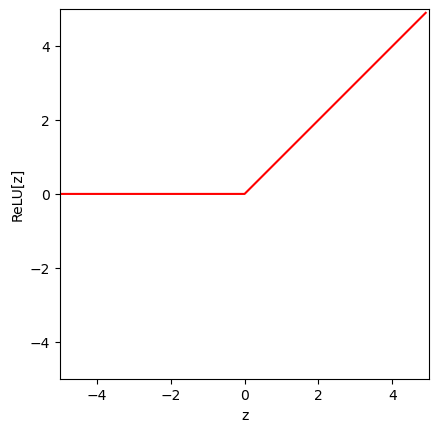

In [4]:

# Make an array of inputs
z = np.arange(-5,5,0.1)
RelU_z = relu(z)
# Plot the ReLU function
fig, ax = plt.subplots()
ax.plot(z,RelU_z,'r-')
ax.set_xlim([-5,5]);ax.set_ylim([-5,5])
ax.set_xlabel('z'); ax.set_ylabel('ReLU[z]')
ax.set_aspect('equal')
plt.show()

In [5]:
def shallow_1_1_3(x, activation_fn, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31):
  # TODO Replace the code below to compute the three initial lines
  # from the theta parameters (i.e. implement equations at bottom of figure 3.3a-c).  These are the preactivations
  pre_1 = theta_10 + theta_11 * x
  pre_2 = theta_20 + theta_21 * x
  pre_3 = theta_30 + theta_31 * x

  # Pass these through the ReLU function to compute the activations as in
  # figure 3.3 d-f
  act_1 = activation_fn(pre_1)
  act_2 = activation_fn(pre_2)
  act_3 = activation_fn(pre_3)

  # TODO Replace the code below to weight the activations using phi1, phi2 and phi3
  # To create the equivalent of figure 3.3 g-i
  w_act_1 = phi_1 * act_1
  w_act_2 =  phi_2 * act_2
  w_act_3 =  phi_3 * act_3

  # TODO Replace the code below to combining the weighted activations and add
  # phi_0 to create the output as in figure 3.3 j
  y = phi_0 + w_act_1 + w_act_2 + w_act_3

  # Return everything we have calculated
  return y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3

In [6]:
# Plot the shallow neural network.  We'll assume input in is range [0,1] and output [-1,1]
# If the plot_all flag is set to true, then we'll plot all the intermediate stages as in Figure 3.3
def plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=False, x_data=None, y_data=None):

  # Plot intermediate plots if flag set
  if plot_all:
    fig, ax = plt.subplots(3,3)
    fig.set_size_inches(8.5, 8.5)
    fig.tight_layout(pad=3.0)
    ax[0,0].plot(x,pre_1,'r-'); ax[0,0].set_ylabel('Preactivation')
    ax[0,1].plot(x,pre_2,'b-'); ax[0,1].set_ylabel('Preactivation')
    ax[0,2].plot(x,pre_3,'g-'); ax[0,2].set_ylabel('Preactivation')
    ax[1,0].plot(x,act_1,'r-'); ax[1,0].set_ylabel('Activation')
    ax[1,1].plot(x,act_2,'b-'); ax[1,1].set_ylabel('Activation')
    ax[1,2].plot(x,act_3,'g-'); ax[1,2].set_ylabel('Activation')
    ax[2,0].plot(x,w_act_1,'r-'); ax[2,0].set_ylabel('Weighted Act')
    ax[2,1].plot(x,w_act_2,'b-'); ax[2,1].set_ylabel('Weighted Act')
    ax[2,2].plot(x,w_act_3,'g-'); ax[2,2].set_ylabel('Weighted Act')

    for plot_y in range(3):
      for plot_x in range(3):
        ax[plot_y,plot_x].set_xlim([0,1]);ax[plot_x,plot_y].set_ylim([-1,1])
        ax[plot_y,plot_x].set_aspect(0.5)
      ax[2,plot_y].set_xlabel('Input, x');
    plt.show()

  fig, ax = plt.subplots()
  ax.plot(x,y)
  ax.set_xlabel('Input, x'); ax.set_xlabel('Input, y')
  ax.set_xlim([0,1]);ax.set_ylim([-1,1])
  ax.set_aspect(0.5)
  if x_data is not None:
    ax.plot(x_data, y_data, 'mo')
    for i in range(len(x_data)):
      ax.plot(x_data[i], y_data[i],)
  plt.show()

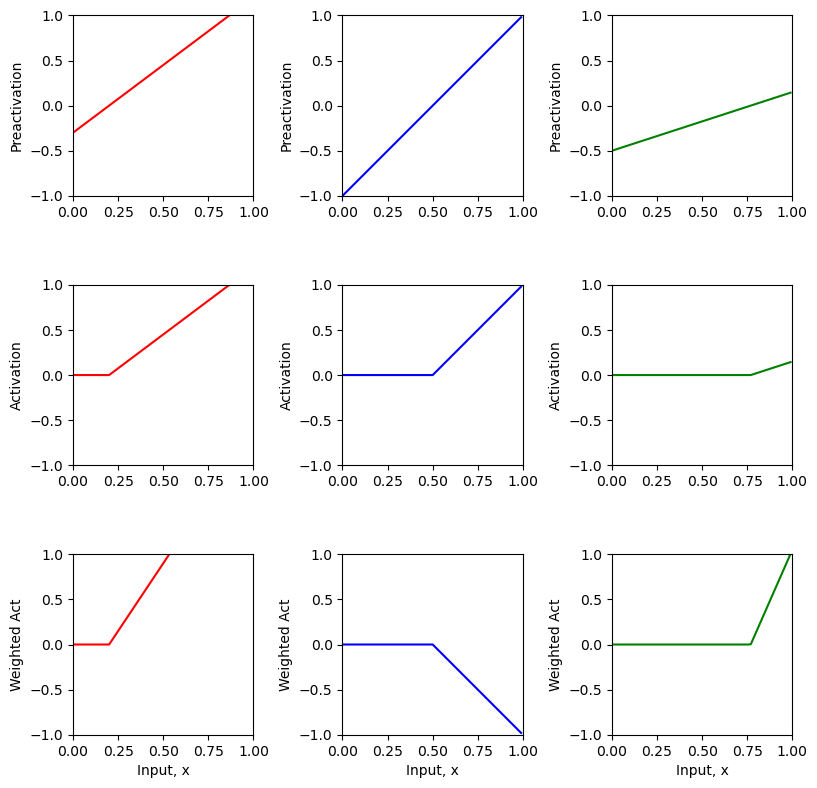

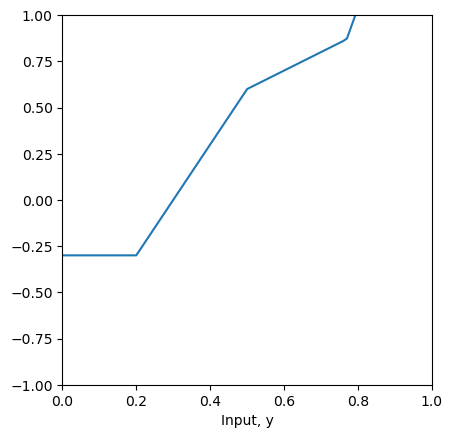

In [22]:
# Now lets define some parameters and run the neural network
theta_10 =  0.3 ; theta_11 = -1.0
theta_20 = -1.0  ; theta_21 = 2.0
theta_30 = -0.5  ; theta_31 = 0.65
phi_0 = -0.3; phi_1 = 2.0; phi_2 = -1.0; phi_3 = 7.0

# Define a range of input values
x = np.arange(0,1,0.01)

# We run the neural network for each of these input values
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, relu, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
# And then plot it
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

In [8]:

# Least squares function
def least_squares_loss(y_train, y_predict):
  # TODO Replace the line below to compute the sum of squared
  # differences between the real values of y and the predicted values from the model f[x_i,phi]
  # (see figure 2.2 of the book)
  # you will need to use the function np.sum
  loss = np.sum((y_train - y_predict) ** 2)
  return loss
     

In [30]:
import torch
import torch.nn as nn
import torch.optim as optim

# Data
x_train = torch.tensor([0.09291784, 0.46809093, 0.93089486, 0.67612654, 0.73441752, 
                        0.86847339, 0.49873225, 0.51083168, 0.18343972, 0.99380898, 
                        0.27840809, 0.38028817, 0.12055708, 0.56715537, 0.92005746, 
                        0.77072270, 0.85278176, 0.05315950, 0.87168699, 0.58858043], dtype=torch.float32).reshape(-1, 1)

y_train = torch.tensor([-0.15934537, 0.18195445, 0.451270150, 0.13921448, 0.09366691, 
                        0.30567674, 0.372291170, 0.40716968, -0.08131792, 0.41187806, 
                        0.36943738, 0.3994327, 0.019062570, 0.35820410, 0.452564960, 
                        -0.0183121, 0.02957665, -0.24354444, 0.148038840, 0.26824970], dtype=torch.float32).reshape(-1, 1)

# Define the model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.hidden = nn.Linear(1, 3)  # Hidden layer with 3 neurons
        self.relu = nn.ReLU()          # ReLU activation
        self.output = nn.Linear(3, 1)  # Output layer

    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        return x

# Initialize the model, define loss function and optimizer
model = SimpleNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train the model
num_epochs = 30000
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(x_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

# Evaluate the model
model.eval()
with torch.no_grad():
    final_loss = criterion(model(x_train), y_train)
    print(f"Final Loss: {final_loss.item()}")

# Get the learned parameters
for name, param in model.named_parameters():
    print(f"{name}: {param.data}")

Final Loss: 0.030686965212225914
hidden.weight: tensor([[ 1.3485],
        [-0.7093],
        [ 1.0581]])
hidden.bias: tensor([-0.0485,  0.6099, -0.0359])
output.weight: tensor([[0.6827, 1.9861, 0.7275]])
output.bias: tensor([-1.1370])


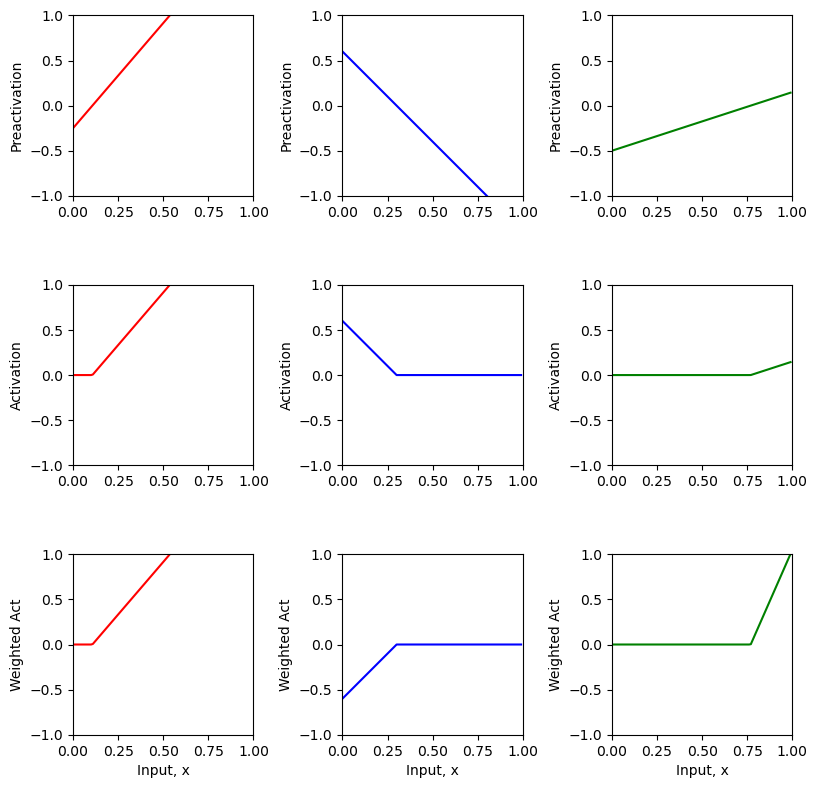

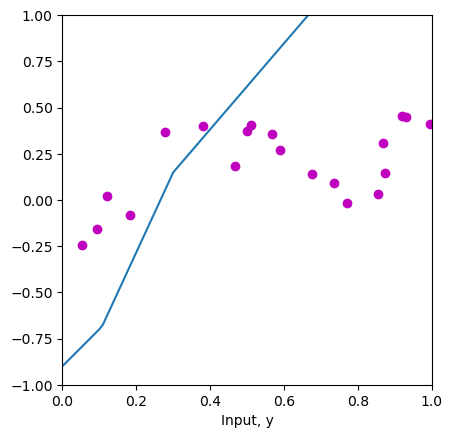

Your Loss = 27.124, True value = 9.385


In [38]:


# Now lets define some parameters, run the neural network, and compute the loss
theta_10 =  -0.25 ; theta_11 = 2.33
theta_20 = 0.6  ; theta_21 = -2.0
theta_30 = -0.5  ; theta_31 = 0.65
phi_0 = -0.3; phi_1 = 1.0; phi_2 = -1.0; phi_3 = 7.0
# Define a range of input values
x = np.arange(0,1,0.01)

x_train = np.array([0.09291784,0.46809093,0.93089486,0.67612654,0.73441752,0.86847339,\
                   0.49873225,0.51083168,0.18343972,0.99380898,0.27840809,0.38028817,\
                   0.12055708,0.56715537,0.92005746,0.77072270,0.85278176,0.05315950,\
                   0.87168699,0.58858043])
y_train = np.array([-0.15934537,0.18195445,0.451270150,0.13921448,0.09366691,0.30567674,\
                    0.372291170,0.40716968,-0.08131792,0.41187806,0.36943738,0.3994327,\
                    0.019062570,0.35820410,0.452564960,-0.0183121,0.02957665,-0.24354444, \
                    0.148038840,0.26824970])

# We run the neural network for each of these input values
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, relu, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
# And then plot it
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True, x_data = x_train, y_data = y_train)

# Run the neural network on the training data
y_predict, *_ = shallow_1_1_3(x_train, relu, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)

# Compute the least squares loss and print it out
loss = least_squares_loss(y_train,y_predict)
print('Your Loss = %3.3f, True value = 9.385'%(loss))

# TODO.  Manipulate the parameters (by hand!) to make the function
# fit the data better and try to reduce the loss to as small a number
# as possible.  The best that I could do was 0.181
# Tip... start by manipulating phi_0.
# It's not that easy, so don't spend too much time on this!
